# IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [256]:
from google.colab import files
 
# select the dataframe of interest
uploaded = files.upload()

Saving store.csv to store (1).csv
Saving train.csv to train (1).csv


In [372]:
train_df = pd.read_csv("train.csv")
store_df = pd.read_csv("store.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Mostramos la columna y el tipo de dato de c/u:

In [373]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [374]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# EXPLORACIÓN DEL DATASET

## Primer acercamiento a los datos

Observaciones a tomar en cuenta de Train_df:

* **Sales**: Tenemos una cantidad de ventas promedio (promediando todas las tiendas) por día de 577 euros, vemos que la cantidad de ventas mínimas en un día en una tienda "y" es de 0 y que la cantidad de ventas máximas en una tienda "x" es de 41.551

* **Customers**: A su vez podemos ver que si promediamos todos los clientes de todas las tiendas tenemos una media de 6 clientes por día, con una máxima de 7.388 clientes en un día "d".

In [375]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Observaciones a tomar en cuenta de Store_df:


* **CompetitionDistance** : Las tiendas en promedio tienen a la competencia a 5404 metros, un 50% de los datos se encuentran en el intervalo CompetitionDistance_<_%50 = [ 20m, 2325m], mientras que el %50 mayor se encuentra en el intervalo [2325m, 75860m].


* **Promo2**: Vemos que aprox la mitad de las tiendas suelen hacer promociones.

In [376]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Tratamiento Valores Nulos

Obtenemos el nombre de las columnas con valores nulos:

In [377]:
missing_val_cols = [col for col in store_df.columns if store_df[col].isnull().any()]

In [378]:
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [379]:
missing_val_cols

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

Vemos que son 3 filas en donde en la columna **CompetitionDistance** tienen un nan, a su vez parece lógico reemplazar ese valor por el valor medio de dicha columna.

In [380]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [381]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()

imputed_cols = pd.DataFrame(my_imputer.fit_transform(store_df[["CompetitionDistance"]]))

# Imputation elimina las columnas por lo que es necesario volver a nombrarlas
imputed_cols.columns = store_df[["CompetitionDistance"]].columns

In [382]:
store_df = store_df.drop("CompetitionDistance", axis=1)

store_df = pd.concat([store_df, imputed_cols], axis=1)

Podemos ver que la cantidad de tiendas que no han hecho promo son 544 dicho número coincide con la cantidad de datos nulos que tenemos en: **Promo2SinceWeek**, **Promo2SinceYear** y **PromoInterval**, esto debe ser, ya que al no tener promo dicha tienda tampoco va a reportar datos en estas columnas, por lo que reemplazar en estas columnas los valores nulos por 0 tiene sentido.

Mismo razonamiento podemos hacer con las columnas **CompetitionOpenSinceMonth**, **CompetitionOpenSinceYear** podría ser más óptimo setear dichos nans en 0 que hacer un imputation.

In [383]:
store_df[store_df["Promo2"] == 0].shape

(544, 10)

Creamos nuevas columnas las cuales indicaran que columnas poseían valores nulos en un principio.

In [384]:
cols_w_label_miss_data = store_df[missing_val_cols].copy()
new_labels = []
for i in range(len(missing_val_cols)):
  new_labels.append(missing_val_cols[i] + "_was_missing")
  cols_w_label_miss_data[new_labels[i]] = store_df[missing_val_cols[i]].isnull()

In [385]:
cols_w_label_miss_data["Promo2SinceWeek"] = store_df["Promo2SinceWeek"].fillna(0)
cols_w_label_miss_data["Promo2SinceYear"] = store_df["Promo2SinceYear"].fillna(0)
cols_w_label_miss_data["PromoInterval"] = store_df["PromoInterval"].fillna(0)
cols_w_label_miss_data["CompetitionOpenSinceMonth"] = store_df["CompetitionOpenSinceMonth"].fillna(0)
cols_w_label_miss_data["CompetitionOpenSinceYear"] = store_df["CompetitionOpenSinceYear"].fillna(0)

In [386]:
store_df= store_df.drop(["Promo2SinceWeek", "Promo2SinceYear", "PromoInterval", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "CompetitionDistance" ], axis=1)

store_df = pd.concat([cols_w_label_miss_data, store_df], axis=1)

In [387]:
store_df

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDistance_was_missing,CompetitionOpenSinceMonth_was_missing,CompetitionOpenSinceYear_was_missing,Promo2SinceWeek_was_missing,Promo2SinceYear_was_missing,PromoInterval_was_missing,Store,StoreType,Assortment,Promo2
0,1270.0,9.0,2008.0,0.0,0.0,0,False,False,False,True,True,True,1,c,a,0
1,570.0,11.0,2007.0,13.0,2010.0,"Jan,Apr,Jul,Oct",False,False,False,False,False,False,2,a,a,1
2,14130.0,12.0,2006.0,14.0,2011.0,"Jan,Apr,Jul,Oct",False,False,False,False,False,False,3,a,a,1
3,620.0,9.0,2009.0,0.0,0.0,0,False,False,False,True,True,True,4,c,c,0
4,29910.0,4.0,2015.0,0.0,0.0,0,False,False,False,True,True,True,5,a,a,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1900.0,6.0,2014.0,31.0,2013.0,"Jan,Apr,Jul,Oct",False,False,False,False,False,False,1111,a,a,1
1111,1880.0,4.0,2006.0,0.0,0.0,0,False,False,False,True,True,True,1112,c,c,0
1112,9260.0,0.0,0.0,0.0,0.0,0,False,True,True,True,True,True,1113,a,c,0
1113,870.0,0.0,0.0,0.0,0.0,0,False,True,True,True,True,True,1114,a,c,0


In [388]:
# Recordemos los labels que anadimos para referenciar las columnas con valores nulos
new_labels

['CompetitionDistance_was_missing',
 'CompetitionOpenSinceMonth_was_missing',
 'CompetitionOpenSinceYear_was_missing',
 'Promo2SinceWeek_was_missing',
 'Promo2SinceYear_was_missing',
 'PromoInterval_was_missing']

In [389]:
# Removemos las columnas que indican cuales variables poseian valores nulos
# Hacemos esto para poder acomodarlas al final del data set, solo por una cuestion de comodidad.
was_missings_cols = pd.concat([store_df.pop(x) for x in new_labels], axis=1)
was_missings_cols

,CompetitionDistance_was_missing,CompetitionOpenSinceMonth_was_missing,CompetitionOpenSinceYear_was_missing,Promo2SinceWeek_was_missing,Promo2SinceYear_was_missing,PromoInterval_was_missing
0,False,False,False,True,True,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,True,True,True
4,False,False,False,True,True,True
...,...,...,...,...,...,...
1110,False,False,False,False,False,False
1111,False,False,False,True,True,True
1112,False,True,True,True,True,True
1113,False,True,True,True,True,True


In [390]:
# Acomodamos los labels al fondo del DataFrame

for i in range(len(new_labels)):
  store_df.insert(len(store_df.columns), new_labels[i], was_missings_cols[was_missings_cols.columns[i]])

In [391]:
store_df

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Store,StoreType,Assortment,Promo2,CompetitionDistance_was_missing,CompetitionOpenSinceMonth_was_missing,CompetitionOpenSinceYear_was_missing,Promo2SinceWeek_was_missing,Promo2SinceYear_was_missing,PromoInterval_was_missing
0,1270.0,9.0,2008.0,0.0,0.0,0,1,c,a,0,False,False,False,True,True,True
1,570.0,11.0,2007.0,13.0,2010.0,"Jan,Apr,Jul,Oct",2,a,a,1,False,False,False,False,False,False
2,14130.0,12.0,2006.0,14.0,2011.0,"Jan,Apr,Jul,Oct",3,a,a,1,False,False,False,False,False,False
3,620.0,9.0,2009.0,0.0,0.0,0,4,c,c,0,False,False,False,True,True,True
4,29910.0,4.0,2015.0,0.0,0.0,0,5,a,a,0,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1900.0,6.0,2014.0,31.0,2013.0,"Jan,Apr,Jul,Oct",1111,a,a,1,False,False,False,False,False,False
1111,1880.0,4.0,2006.0,0.0,0.0,0,1112,c,c,0,False,False,False,True,True,True
1112,9260.0,0.0,0.0,0.0,0.0,0,1113,a,c,0,False,True,True,True,True,True
1113,870.0,0.0,0.0,0.0,0.0,0,1114,a,c,0,False,True,True,True,True,True


In [392]:
# Chekeamos

store_df.isnull().any()

CompetitionDistance                      False
CompetitionOpenSinceMonth                False
CompetitionOpenSinceYear                 False
Promo2SinceWeek                          False
Promo2SinceYear                          False
PromoInterval                            False
Store                                    False
StoreType                                False
Assortment                               False
Promo2                                   False
CompetitionDistance_was_missing          False
CompetitionOpenSinceMonth_was_missing    False
CompetitionOpenSinceYear_was_missing     False
Promo2SinceWeek_was_missing              False
Promo2SinceYear_was_missing              False
PromoInterval_was_missing                False
dtype: bool

## Exploracion del DataFrame.

Observaciones a tener en cuenta:

* Aproximadamente la mitad de las tiendas eligen tener algún tipo de promoción.

* Podemos ver que podría haber cierta correlación entre la columna **Open** y **SchoolHoliday**

* Obviamente tenemos una correlación entre la columna **Sales** y **Customers**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff68c5f0350>,
      dtype=object)

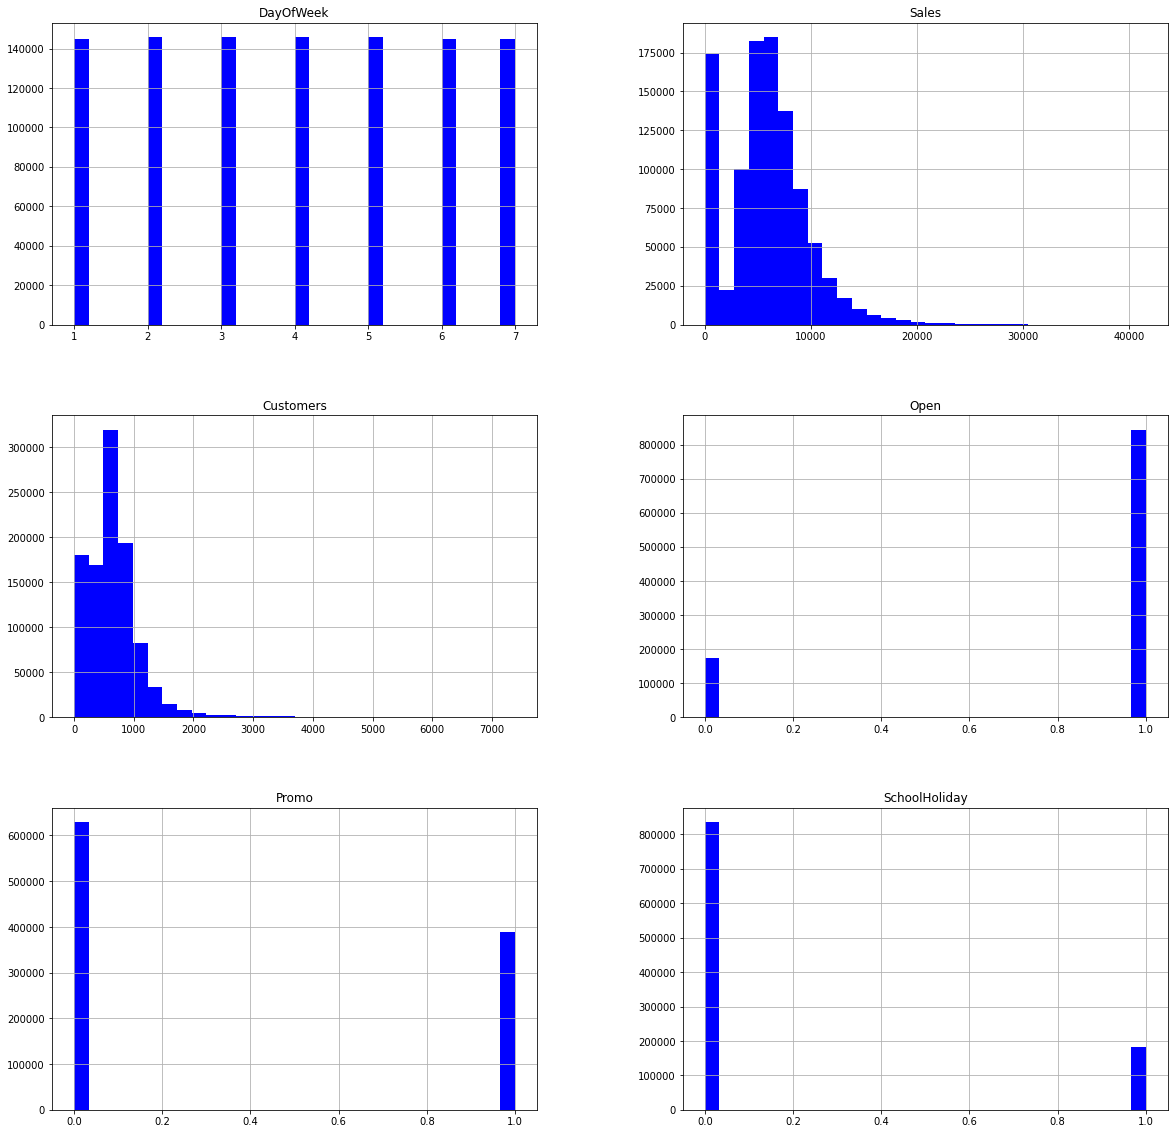

In [393]:
train_df.drop("Store", axis=1).hist(bins=30, figsize=(20,20), color="b")

Pasemos a visualizar el dataframe de la informacion de dichas tiendas

Podemos hacer las siguientes observaciones:

* Corroboramos que aprox la mitad de tiendas ofrecen promociones mientras que la otra mitad no.

* Al parecer las tiendas eligen empezar sus promociones a partir de la semana 10-15 y 30-41 y 42-49, esto podría ser por vacaciones/fechas-festivas.

* Podemos ver que la distancia a la gran competencia suele ser menor a 5000m.

**Observación importante**, ya que hicimos un imputation (rellenamos los valores nulos de algunas columnas con la media de esta o con 0's) algunos valores podrían no ser los reales, **hay que tener cuidado**. 

Por ejm: las columnas "Promo2SinceWeek"y "Promo2SinceYear" al reemplazar los nans por 0 es común ver un gran pico cerca de ese valor y no necesariamente indicaría que las tiendas optan por empezar sus promociones el año 0 y la semana 0....

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff68c17edd0>,
      dtype=object)

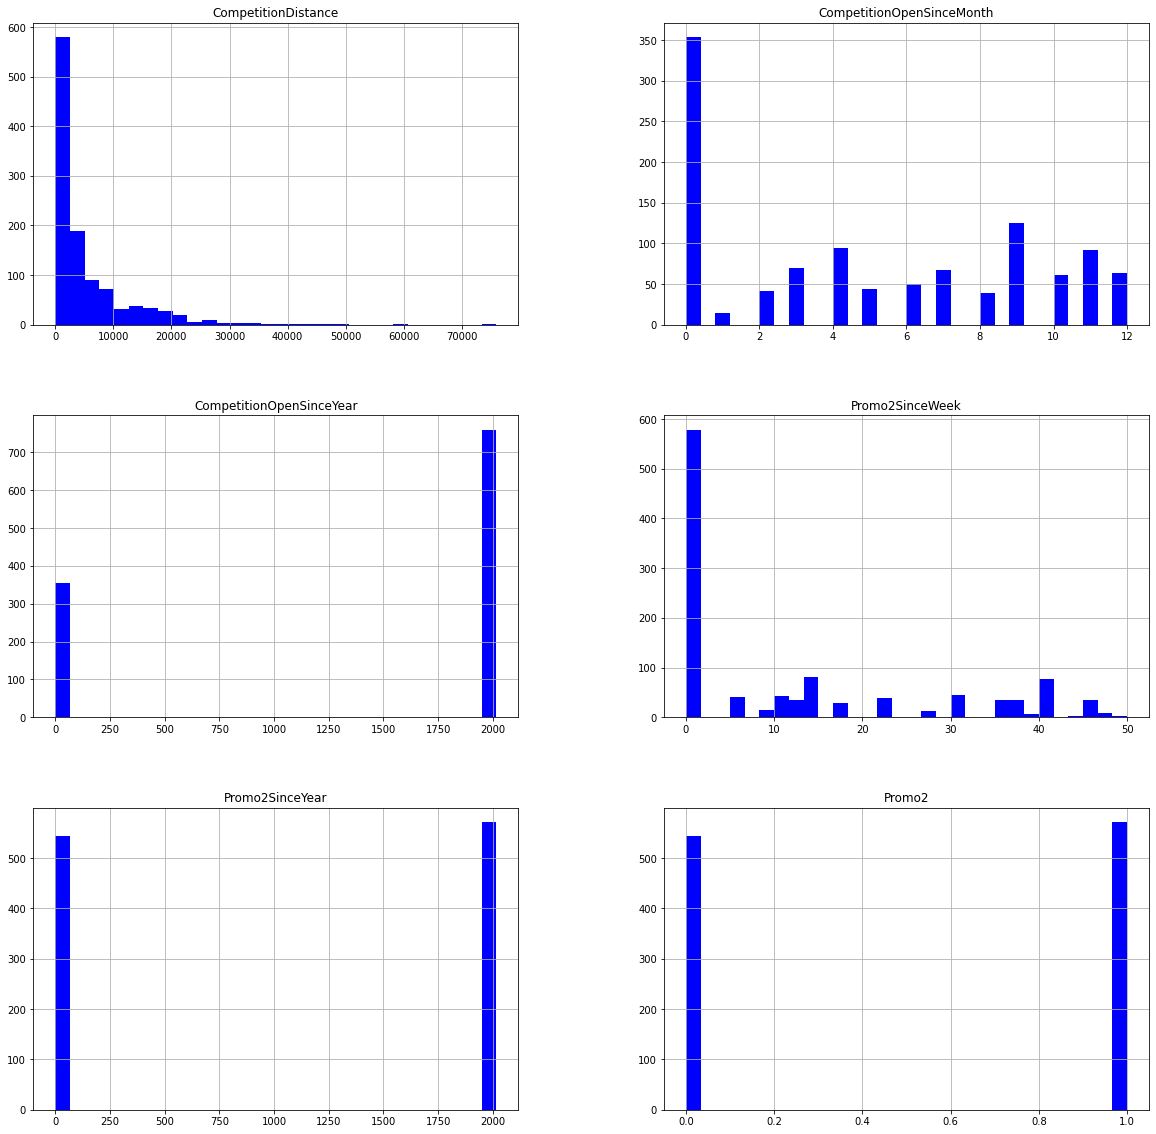

In [394]:
store_df.drop("Store", axis=1).hist(bins=30, figsize=(20,20), color="b")

Por ahora analizaremos los datos en donde la columna Open es 1, ie las tiendas abiertas.

In [395]:
open_stores_df = train_df[train_df["Open"]==1].copy()
closed_stores_df = train_df[train_df["Open"]==0].copy()

**Observación trivial**:

Podemos ver como cambian los histogramas ahora que solo contemplamos las tiendas cuando se encuentran abiertas..


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff68c6252d0>,
      dtype=object)

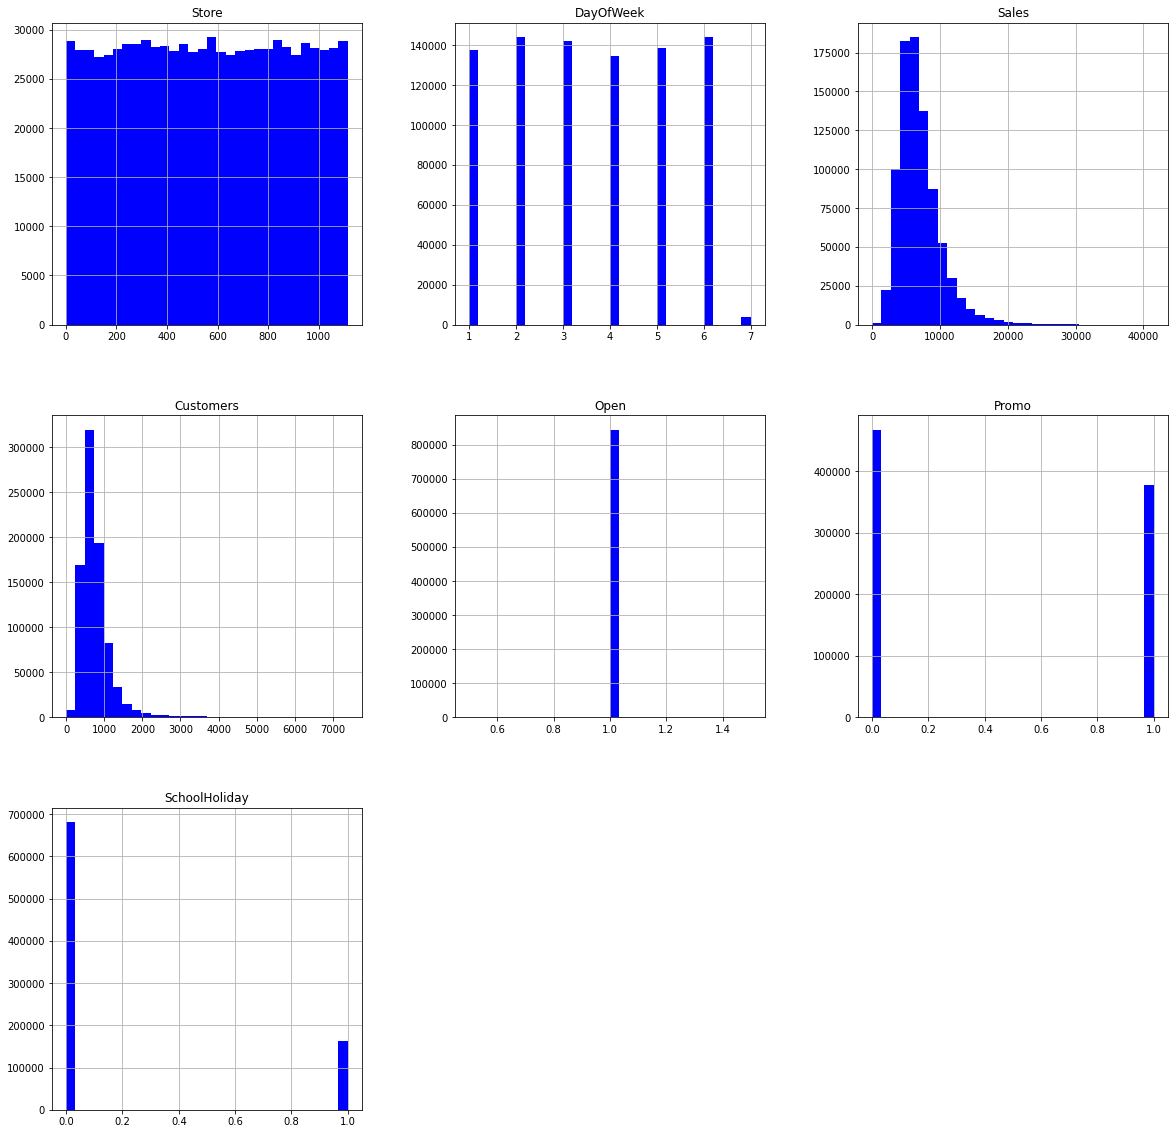

In [396]:
open_stores_df.hist(bins=30, figsize=(20,20), color="b")

## Mergeamos el DataSet

(Una opinión personal es tener estos dos dataset (el de train_df y store_df) separados pues si no al mergear se repetirá mucha información innecesaria, aun así parece de interés hacer un análisis de dichos dataset unidos)

In [397]:
# Aqui solo haremos el analisis aplicado a las tiendas que estan abiertas

join_df = pd.merge(store_df, train_df[train_df["Open"]==1], how="inner", on="Store")

In [398]:
# Chequeamos que el numero de columnas se corresponda, el -1 xq el campo "Store" se repite 2 veces

len(join_df.columns) == len(store_df.columns) + len(train_df.columns) - 1

True

In [399]:
store_df.columns

Index(['CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear',
       'PromoInterval', 'Store', 'StoreType', 'Assortment', 'Promo2',
       'CompetitionDistance_was_missing',
       'CompetitionOpenSinceMonth_was_missing',
       'CompetitionOpenSinceYear_was_missing', 'Promo2SinceWeek_was_missing',
       'Promo2SinceYear_was_missing', 'PromoInterval_was_missing'],
      dtype='object')

In [400]:
join_df.head(10)

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Store,StoreType,Assortment,Promo2,...,Promo2SinceYear_was_missing,PromoInterval_was_missing,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1270.0,9.0,2008.0,0.0,0.0,0,1,c,a,0,...,True,True,5,2015-07-31,5263,555,1,1,0,1
1,1270.0,9.0,2008.0,0.0,0.0,0,1,c,a,0,...,True,True,4,2015-07-30,5020,546,1,1,0,1
2,1270.0,9.0,2008.0,0.0,0.0,0,1,c,a,0,...,True,True,3,2015-07-29,4782,523,1,1,0,1
3,1270.0,9.0,2008.0,0.0,0.0,0,1,c,a,0,...,True,True,2,2015-07-28,5011,560,1,1,0,1
4,1270.0,9.0,2008.0,0.0,0.0,0,1,c,a,0,...,True,True,1,2015-07-27,6102,612,1,1,0,1
5,1270.0,9.0,2008.0,0.0,0.0,0,1,c,a,0,...,True,True,6,2015-07-25,4364,500,1,0,0,0
6,1270.0,9.0,2008.0,0.0,0.0,0,1,c,a,0,...,True,True,5,2015-07-24,3706,459,1,0,0,0
7,1270.0,9.0,2008.0,0.0,0.0,0,1,c,a,0,...,True,True,4,2015-07-23,3769,503,1,0,0,0
8,1270.0,9.0,2008.0,0.0,0.0,0,1,c,a,0,...,True,True,3,2015-07-22,3464,463,1,0,0,0
9,1270.0,9.0,2008.0,0.0,0.0,0,1,c,a,0,...,True,True,2,2015-07-21,3558,469,1,0,0,0


## Correlaciones

Observaciones que surgen a partir de las correlaciones:

* Podemos ver que hay cierta relación NEGATIVA con la columna Sales y las columnas DayOfWeek ( a medida que esta aumenta las ventas decrecen)

* Promo2SinceYear y Sales, dicho valor negativo podemos pensarlo como a medida que las promociones arrancan más tarde menor es el número de ventas

* Los clientes y la promoción se correlacionan positivamente con las ventas (bastante trivial)

* Vemos cierta relación entre Promo y la variable Ventas.

In [401]:
corr = join_df.corr()["Sales"].sort_values()
corr

DayOfWeek                               -0.178736
Promo2SinceYear                         -0.127621
Promo2                                  -0.127596
Promo2SinceWeek                         -0.058476
CompetitionDistance                     -0.036343
CompetitionOpenSinceMonth               -0.018370
CompetitionOpenSinceMonth_was_missing   -0.005195
CompetitionOpenSinceYear_was_missing    -0.005195
CompetitionOpenSinceYear                 0.005266
Store                                    0.007710
SchoolHoliday                            0.038617
Promo2SinceWeek_was_missing              0.127596
Promo2SinceYear_was_missing              0.127596
PromoInterval_was_missing                0.127596
Promo                                    0.368145
Customers                                0.823597
Sales                                    1.000000
CompetitionDistance_was_missing               NaN
Open                                          NaN
Name: Sales, dtype: float64

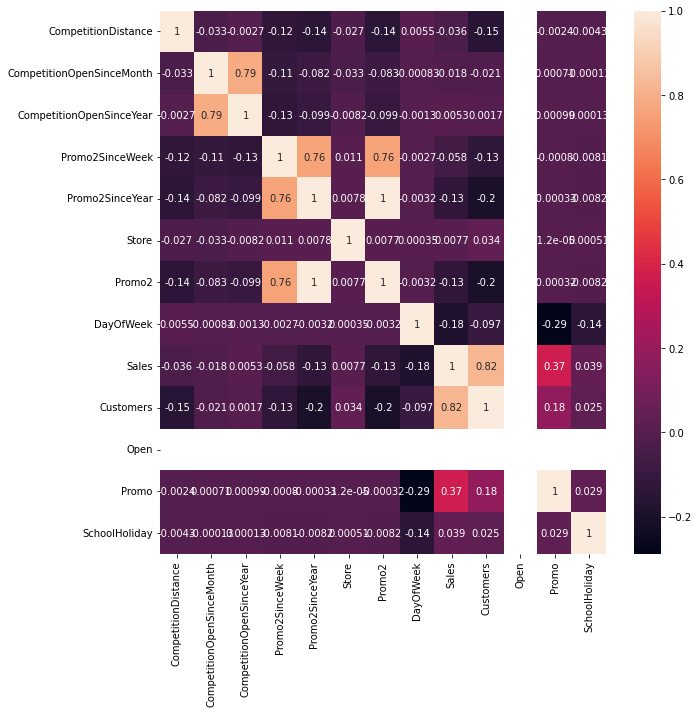

In [402]:
# Borramos los labels que indican las columnas dnd tenemos variables nulas ya que no hace falta para analizar correlaciones
total_corr = join_df.drop(new_labels, axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(total_corr, annot=True)

## Analizando fechas

In [403]:
# Separemos el año y pongámoslo en una columna separada

join_df["Year"] = pd.DatetimeIndex(join_df["Date"]).year

# Hagamos lo mismo para el día y el mes
join_df["Day"] = pd.DatetimeIndex(join_df["Date"]).day
join_df["Month"] = pd.DatetimeIndex(join_df["Date"]).month

In [404]:
join_df[["Day", "Month", "Year"]].head(10)

,Day,Month,Year
0,31,7,2015
1,30,7,2015
2,29,7,2015
3,28,7,2015
4,27,7,2015
5,25,7,2015
6,24,7,2015
7,23,7,2015
8,22,7,2015
9,21,7,2015


Aquí podemos observar las ventas promedio y la cantidad de clientes por mes de **todas las tiendas en promedio**.

Parece que las ventas y el número de clientes alcanzan su punto máximo en el período de Navidad

* Vemos cierta relación entre Promo y la variable Ventas.

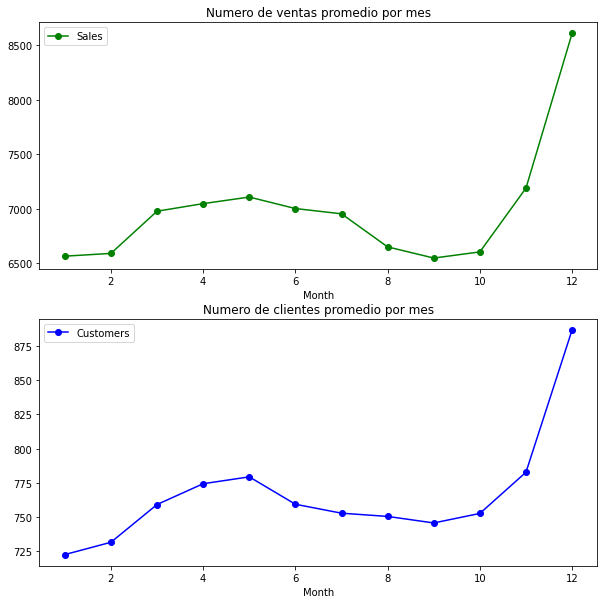

In [405]:
fig ,axs= plt.subplots(2,1,figsize=(10,10))

axs[0].set_title("Numero de ventas promedio por mes")
join_df.groupby("Month")[["Sales"]].mean().plot(marker="o", color="g", ax=axs[0])

axs[1].set_title("Numero de clientes promedio por mes")
join_df.groupby("Month")[["Customers"]].mean().plot(marker="o", color="b", ax=axs[1])

Veamos que pasa si analizamos las ventas y clientes dependiendo el día de la semana.
Notamos que hay un incremento de ventas y clientes los primeros días y a medida que se llega al último día de la semana estos bajan.

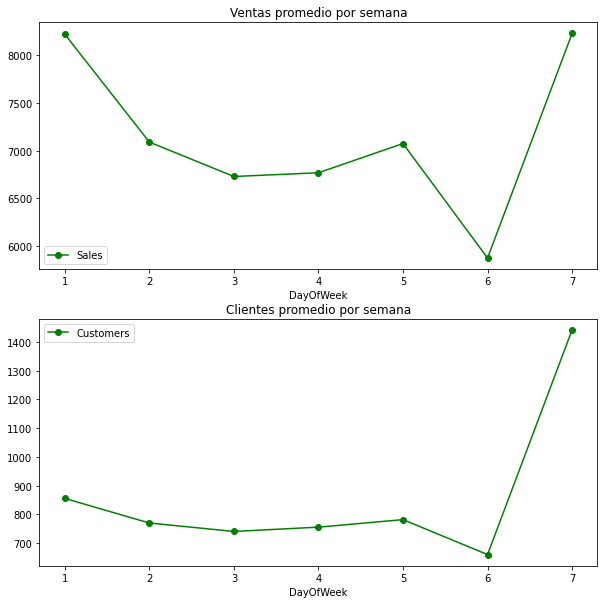

In [406]:
fig, axs=plt.subplots(2,1,figsize=(10,10))

axs[0].set_title("Ventas promedio por semana")
join_df.groupby("DayOfWeek")[["Sales"]].mean().plot( marker="o", color="g", ax=axs[0])

axs[1].set_title("Clientes promedio por semana")
join_df.groupby("DayOfWeek")[["Customers"]].mean().plot( marker="o", color="g", ax=axs[1])

Aquí podemos analizar las ventas según el tipo de tienda y la fecha. Podemos observar que las tiendas de tipo B y C son las que notan una mejoría frente a las otras.

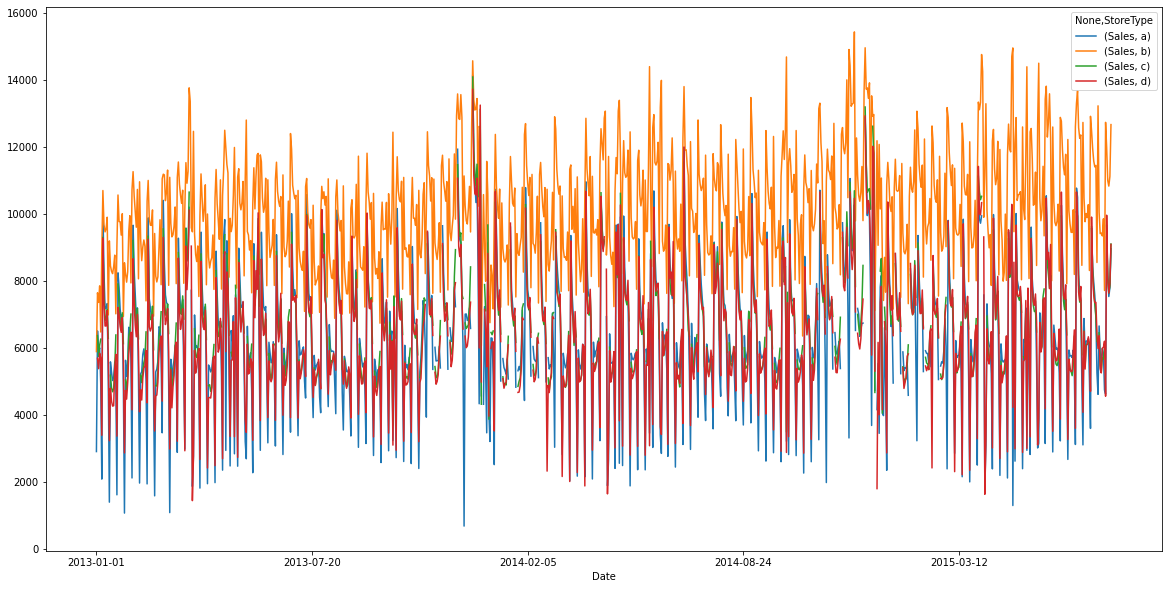

In [407]:
join_df.groupby(["Date", "StoreType"])[["Sales"]].mean().unstack().plot(figsize=(20,10))

Podemos observar que las tiendas que hacen promociones obtienen más ventas y obviamente más clientes.

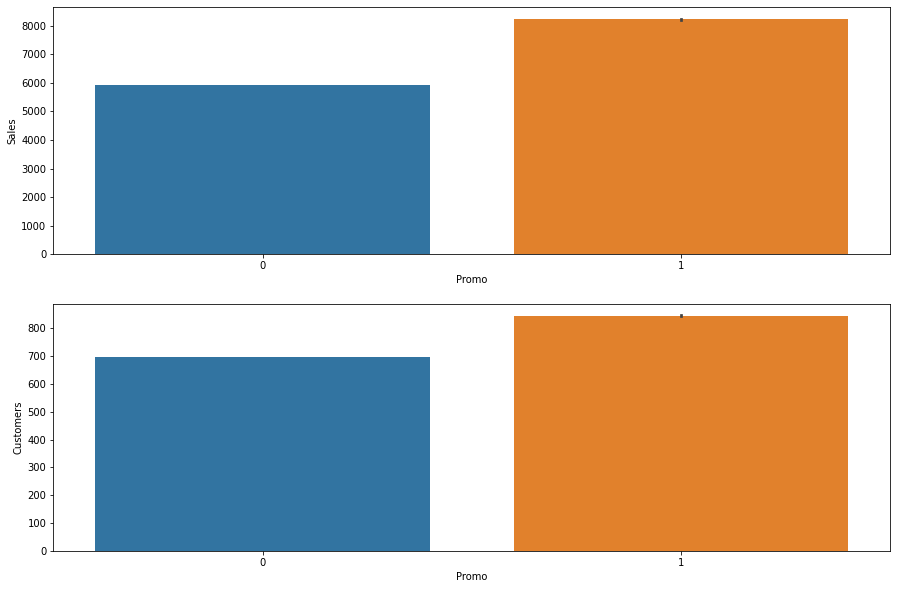

In [408]:
fig, axs =plt.subplots(2,1,figsize=(15,10))

sns.barplot(x="Promo", y = "Sales", data=join_df, ax=axs[0])
sns.barplot(x="Promo", y = "Customers", data=join_df, ax=axs[1])

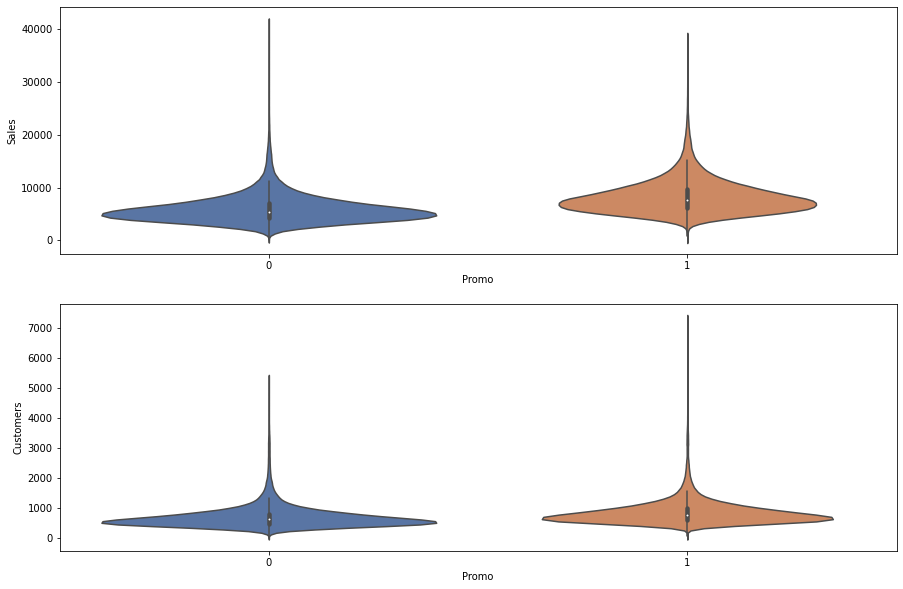

In [409]:
fig, axs =plt.subplots(2,1,figsize=(15,10))
sns.set_theme(style="whitegrid")

sns.violinplot(x="Promo", y = "Sales", data=join_df, ax=axs[0])
sns.violinplot(x="Promo", y = "Customers", data=join_df, ax=axs[1])

# ENTRENAR AL MODELO

In [410]:
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 87 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.5 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639907 sha256=7e71fb961a1fc45353ccced9e9df1368e6548babca122a75e0fa5e90bf76a2e9
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the p

In [411]:
def sales_prediction(store_id, sales_df, periods):
  sales_df = sales_df[sales_df["Store"]== store_id]

  # Es necesario cambiar el nombre de las columnas date y sales por las respc sino el modelo no anda.. lol
  sales_df = sales_df[["Date","Sales"]].rename(columns= {"Date": "ds", "Sales": "y"})
  sales_df = sales_df.sort_values("ds")

  model = Prophet()
  model.fit(sales_df)

  pred = model.make_future_dataframe(periods=periods)
  forecast = model.predict(pred)

  fig = model.plot(forecast, xlabel="Fecha", ylabel="Ventas")
  fig2 = model.plot_components(forecast)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


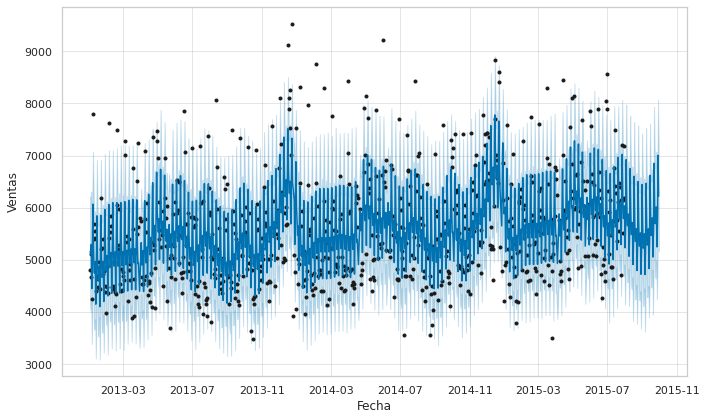

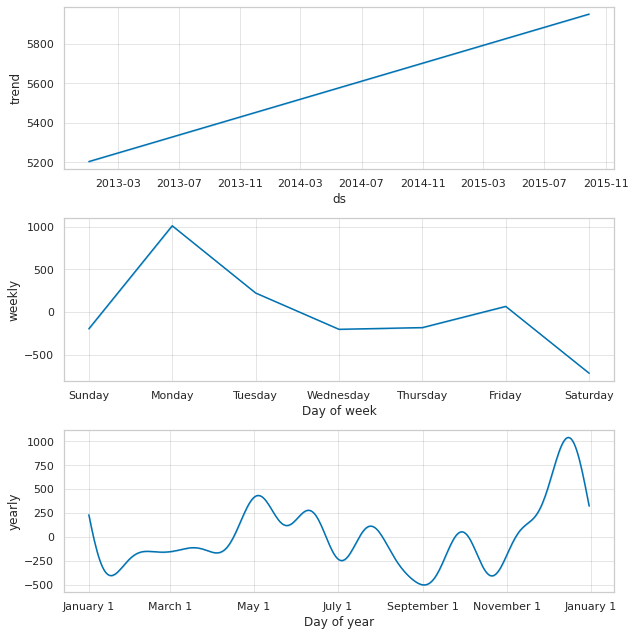

In [412]:
df_ = sales_prediction(10, join_df, 60)
df_

## Ajuste del modelo

- StateHoliday: indica si el día era festivo o no (a = vacaciones públicas, b = vacaciones de Pascua holiday, c = Navidades, 0 = No era festivo)
- SchoolHoliday: indica si (Store, Date) se ve afectado por el cierre de las escuelas públicas
  

In [413]:
def sales_prediction(store_id, sales_df, holidays, periods):
  sales_df = sales_df[sales_df["Store"]== store_id]
  sales_df = sales_df[["Date","Sales"]].rename(columns= {"Date": "ds", "Sales": "y"})
  sales_df = sales_df.sort_values("ds")

  model = Prophet(holidays=holidays)
  model.fit(sales_df)

  pred = model.make_future_dataframe(periods=periods)
  forecast = model.predict(pred)

  fig = model.plot(forecast, xlabel="Fecha", ylabel="Ventas")
  fig2 = model.plot_components(forecast)

In [426]:
# Obtener todas las fechas relacionadas con las vacaciones escolares

school_holidays = train_df[train_df["SchoolHoliday"]==1]["Date"]
school_holidays = np.unique(school_holidays)

In [427]:
# Obtener todas las fechas correspondientes a los festivos estatales
state_holidays = train_df[(train_df["StateHoliday"] =="a") | (train_df["StateHoliday"] =="b")| (train_df["StateHoliday"] =="c")]["Date"]
state_holidays = np.unique(state_holidays)

In [428]:
school_holidays = pd.DataFrame({"ds": pd.to_datetime(school_holidays), "holiday":"school_holiday"})
state_holidays = pd.DataFrame({"ds": pd.to_datetime(state_holidays), "holiday":"state_holiday"})


In [429]:
# Concatenamos las holidays

holidays_df = pd.concat([school_holidays, state_holidays], axis=0)
holidays_df

,ds,holiday
0,2013-01-01,school_holiday
1,2013-01-02,school_holiday
2,2013-01-03,school_holiday
3,2013-01-04,school_holiday
4,2013-01-05,school_holiday
...,...,...
32,2015-04-06,state_holiday
33,2015-05-01,state_holiday
34,2015-05-14,state_holiday
35,2015-05-25,state_holiday


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


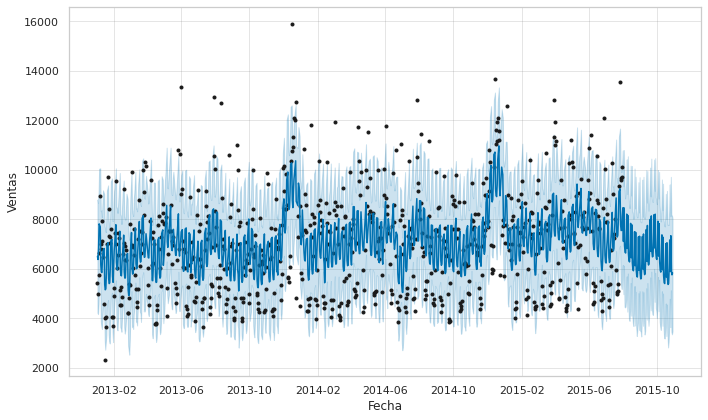

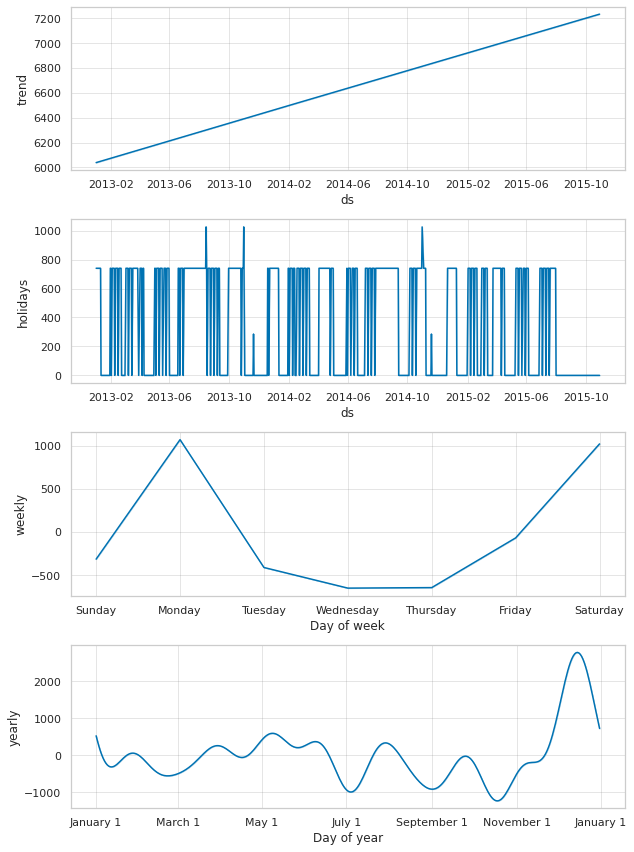

In [431]:
# Hagamos predicciones usando días festivos para una tienda específica
sales_prediction(666, join_df, holidays_df, 90)